In [9]:
from pathlib import Path
from shutil import rmtree
from time import sleep
import mplfinance as mpf
import pandas as pd
from loguru import logger
pd.options.mode.chained_assignment = None
from experts import ByBitExpert, PyConfig
from datetime import datetime
import numpy as np
import pandas as pd
from easydict import EasyDict
from copy import deepcopy
import telebot
from PIL import Image
import pickle
import sys
from pybit.unified_trading import HTTP
import matplotlib.pyplot as plt

In [13]:
data = pickle.load(open("h", "rb"))

In [5]:
logger.remove()
logger.add(sys.stderr, level="DEBUG")
cfg = PyConfig().test()
cfg.ticker = sys.argv[1]
cfg.save_plots = True
cfg.ticker = "ETHUSDT"
cfg.lot = 0.01 if cfg.ticker == "ETHUSDT" else 0.001

api_key, api_secret, bot_token = Path("./configs/api.yaml").read_text().splitlines()

session = HTTP(
    testnet=False,
    api_key=api_key,
    api_secret=api_secret,
)

In [17]:
tmessage = session.get_server_time()["result"]
tmessage

{'timeSecond': '1707818213', 'timeNano': '1707818213323736219'}

In [18]:
message = session.get_kline(category="linear",
                symbol=cfg.ticker,
                interval=cfg.period[1:],
                start=0,
                end=int(tmessage["timeNano"])*1000,
                limit=cfg.hist_buffer_size)

In [26]:
data = np.array(message["result"]["list"], dtype=np.float64)[::-1]
data[:10, 0]
# pd.to_datetime(data[:, 0]*1000000)

array([1.70781438e+12, 1.70781444e+12, 1.70781450e+12, 1.70781456e+12,
       1.70781462e+12, 1.70781468e+12, 1.70781474e+12, 1.70781480e+12,
       1.70781486e+12, 1.70781492e+12])

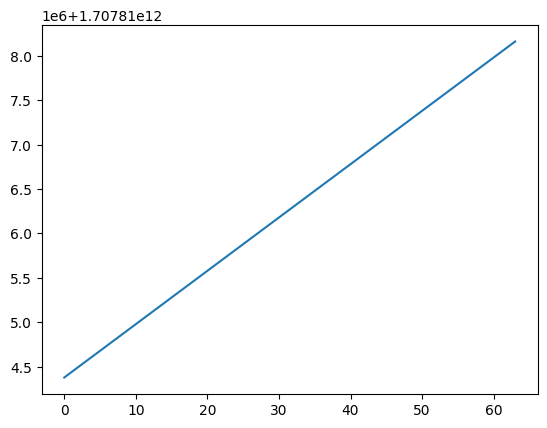

In [27]:
plt.plot(data[:, 0])

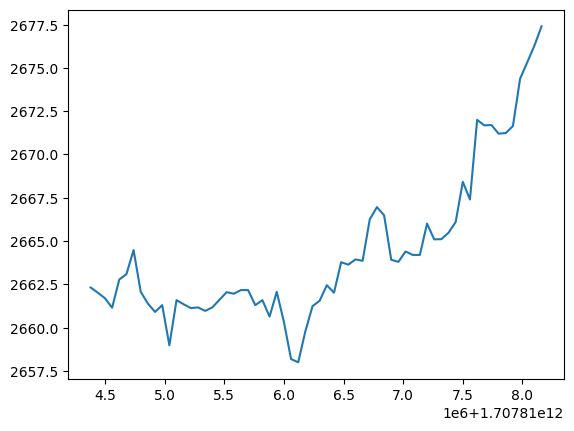

In [28]:
plt.plot(data[:, 0], data[:, 3])